# Midterm Project

The midterm project is designed to let you apply what you have learned so far, and demonstrate that you have mastered it. The submission will be graded on the correctness of the execution of your analysis (50%), the ambitiousness of the problems chosen (30%), and the creativity of your questions and solutions (20%).

Please note that the project is *individual*, and the solutions will be checked for substantial overlap. However, you should feel free to discuss problems and ideas with your class mates, just do not share code.

Your submission should include all outputs and be self-contained, so it can be executed if necessary.


## Submission
The project is due on ***March 27 2020, 23:59 CET***. The time stamp of the email or upload determines the submission time. *Late submissions will NOT be considered, and graded as 0.* To submit, please:

1. rename this file with your student ID
2. copy this file and all additional data into a folder with your student ID
3. zip the entire folder
4. send a copy of the zip file to Tommaso Fornaciari <fornaciari@unibocconi.it>

For large files, you can use `wetransfer`. Please do not use Dropbox links, since they are not time-stamped!

## Metalcore and Hardcore are OK to listen to, please believe me!
While having a hobby of playing electric guitar for the past 15 years, I went through multiple stages from playing classical music to technical metal. One of the styles I have spent listening to and playing the most is **Metalcore and Hardcore**, two styles played by **Straight Edge** community (members don't drink, don't do drugs and try to raise awareness of problems of the society and world around them).

Well... It's just a bit tough to **spot** the message of peace and love sometimes hahaha

<img src="https://tenor.com/view/moshpit-mosh-pit-gif-5144981.gif"/> 
<img src="https://tenor.com/view/betrying-the-martyrs-man-made-disaster-metalcore-deathcore-breakdown-gif-13487881.gif"/>

... But! **Here comes my project to save the day** (and show that Metalcore and Hardcore genres are more than a way to break someone's leg at the concert). More specifically, I would like to show that the two genres have deep, thoughful lyrics addressing deeper issues in society that are so often missing in mainsteam music.

I downloaded around **2000 lyrics** of songs written by my favorite bands including:

<br><center>   **Beartooth** - raising awareness about mental health
<br>   **In Hearts Wake** - focusing on co-existance of human kind and nature
<br>   **Being As An Ocean** - showing that revealing your feelings is an ok thing to do even for macho-males </center>

In [3]:
# Importing all the needed modules for preprocessing first
from bs4 import BeautifulSoup
import ssl
from urllib.request import Request, urlopen

import time 
from time import sleep

from random import randint
import re
import contractions
import pickle

from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords

from gensim.models import Word2Vec
from gensim.models.word2vec import FAST_VERSION
import unicodedata
import inflect

import pandas as pd

from collections import Counter
import spacy


from matplotlib import colors
from matplotlib.text import TextPath
import matplotlib.pyplot as plt

from sklearn.neighbors import KDTree
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

from gensim.models import LdaModel, TfidfModel, CoherenceModel
from gensim.corpora import Dictionary
import gensim

import multiprocessing
from collections import defaultdict
import numpy as np
import seaborn as sns
import math
from mpl_toolkits.mplot3d import Axes3D
from nltk import FreqDist

In [4]:
# For ignoring SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [5]:
#Storing all the band names and lyrics addresses in the format feasible for scraping 
bands = {"like-moths-to-flames":"https://www.lyrics.com/artist/Like-Moths-to-Flames/2491089",
          "while-she-sleeps":"https://www.lyrics.com/sub-artist/While-She-Sleeps/27658",
          "underoath":"https://www.lyrics.com/artist/Underoath/521422",
          "as-i-lay-dying":"https://www.lyrics.com/artist/As-I-Lay-Dying/513658",
          "letlive":"https://www.lyrics.com/artist/Letlive/664075",
          "after-the-burial":"https://www.lyrics.com/artist/After-the-Burial/864060",
          "attila":"https://www.lyrics.com/artist/Attila/705819",
          "betraying-the-martyrs":"https://www.lyrics.com/artist/Betraying-the-Martyrs/2141274",
          "born-of-osiris":"https://www.lyrics.com/artist/Betraying-the-Martyrs/2141274",
          "the-color-morale":"https://www.lyrics.com/artist/The-Color-Morale/1166347",
          "enter-shikari":"https://www.lyrics.com/artist/Enter-Shikari/857147",
          "fit-for-a-king":"https://www.lyrics.com/artist/Fit-for-a-King/2746625",
          "the-gost-inside":"https://www.lyrics.com/artist/The-Ghost-Inside/987377",
          "beartooth":"https://www.lyrics.com/artist/Beartooth/2863521",
           "asking-alexandria":"https://www.lyrics.com/artist/Asking-Alexandria/1168003",
           "in-hearts-wake":"https://www.lyrics.com/artist/In-Hearts-Wake-/2700417",
           "architects":"https://www.lyrics.com/artist/Architects/880726",
           "stick-to-your-guns":"https://www.lyrics.com/artist/Stick-to-Your-Guns/867494",
           "northlane":"https://www.lyrics.com/artist/Northlane/2693959",
           "the-amity-affliction":"https://www.lyrics.com/artist/The-Amity-Affliction/738551",
           "august-burns-red":"https://www.lyrics.com/artist/August-Burns-Red/671053",
           "we-came-as-romans":"https://www.lyrics.com/artist/We-Came-as-Romans/1565093",
           "bring-me-the-horizon":"https://www.lyrics.com/artist/Bring-Me-the-Horizon/831398",
           "parkway-drive":"https://www.lyrics.com/artist/Parkway-Drive/820903",
           "this-wild-life":"https://www.lyrics.com/artist/This-Wild-Life/2769782",
           "our-last-night":"https://www.lyrics.com/artist/Our-Last-Night/1021614",
           "dance-gavin-dance":"https://www.lyrics.com/artist/Dance-Gavin-Dance/847782",
           "crown-the-empire":"https://www.lyrics.com/artist/Crown-the-Empire/2710232",
           "blessthefall":"https://www.lyrics.com/artist/blessthefall/864094",
           "sleeping-with-sirens":"https://www.lyrics.com/artist/Sleeping-with-Sirens/2101310",
           "pvris":"https://www.lyrics.com/artist/PVRIS/3018227",
           "the-devil-wears-prada":"https://www.lyrics.com/artist/The-Devil-Wears-Prada/822710",
           "silverstein":"https://www.lyrics.com/artist/Silverstein/559038"}

In [ ]:
#Preparing a list for the downloaded lyrics
just_lyrics = []

"""
First, all the names of the songs from the different bands are scraped, from Lyrics.com webpage, into a list.
After, every song scraped this way is looked up on genius.com, a lyrics website, and the lyrics are scraped.

The approach is used as the first site has a very convenient way of scraping songs (all songs on one page) and the second site 
has an easy access to the specific lyrics (the name of the band and the song is right in the HTML code)

"""
# CREATION OF LIST OF just_lyrics:
for band, url_songs in bands.items():
     
     print("downloading" + " " + band)
     # Making the website believe that you are accessing it using a mozilla browser
     req = Request(url_songs, headers = { 'User-Agent' : 'Mozilla/5.0' })
     webpage = urlopen(req).read()
     
     soup = BeautifulSoup(webpage, 'html.parser')
     html = soup.prettify('utf-8')
     names_of_songs = []
     
     # Now we are collecting all names of the songs we are able to scrape
     for td in soup.findAll('td', attrs = {'class': 'tal qx'}):
             names_of_songs.append(td.text.strip())
     
     # Processing of the names of songs for lyrics download part
     clean_songlist = []
     for name_of_song in names_of_songs:
         if name_of_song != "":
             name_of_song = name_of_song.replace(" ","-")
             name_of_song = re.sub("[0-9]+\.--","",name_of_song)
             clean_songlist.append(name_of_song)
             
          
     sleep(randint(1,3))
     for clean_song in clean_songlist:
         url = "https://genius.com/" + band + "-" + clean_song + "-" + "lyrics"
         # Making the website believe that you are accessing it using a mozilla browser
         try:
             req = Request(url, headers = { 'User-Agent' : 'Mozilla/5.0' })
             webpage = urlopen(req).read()
         
         # Creating a BeautifulSoup object of the html page for easy extraction of data.
         
             soup = BeautifulSoup(webpage, 'html.parser')
             html = soup.prettify('utf-8')
         
         #Extract the Lyrics of each song
             for div in soup.findAll('div', attrs = {'class': 'lyrics'}):
                 just_lyrics.append(div.text.strip().split("\n"))
             print(clean_song + " OK")
         
         except:
             pass

<center> Now we have **lyrics** of 2000 different songs from the bands mentioned before, next, I am saving them into the "lyrics.txt" file just to make sure that the analysis does not change if the websites change. Also, I would scrape more songs but the genre is very specific and I already chose all of the representative bands...

<center> **I will enclose the saved .txt files to the final output so you do not have to scrape the data (it takes around 30-40 minutes)**

In [7]:
# Here I am loading the scraped data instead of scraping them every time
with open("lyrics.txt", "rb") as fp:
    just_lyrics = pickle.load(fp)
    
just_lyrics[0]

['[Chorus]',
 "I promise you there's times I'm not so sad",
 'Some days the good will even out the bad',
 "I know I'm married to my problems",
 "It's always in my head",
 "And I'm destined for greatness or death",
 'Destined for greatness or death!',
 '',
 '[Verse 1]',
 'Thought I was standing tall',
 'Repressed with no resolve',
 "Happiness and ignorance aren't so different after all",
 '',
 '[Pre Chorus]',
 'Thought I was being strong',
 "This time you're in the wrong",
 "I've lived a lie too long",
 "I've lived a lie too long",
 'Now push has come to shove',
 'I signed the deed in blood',
 'I need another drug',
 'I need another drug',
 '',
 '[Chorus]',
 "I promise you there's times I'm not so sad",
 'Some days the good will even out the bad',
 "I know I'm married to my problems",
 "It's always in my head",
 "And I'm destined for greatness or death",
 'Destined for greatness or death',
 '',
 '[Verse 2]',
 'Thought I could make demands',
 'Now I can barely stand',
 'Comfort quickly f

<center> The last initial cleaning needed is **removal** of description of different parts of the songs such as "[Verse 1]" 


In [8]:
preprocessed_lyrics = []

lyrics_to_mess_with = just_lyrics

for song in lyrics_to_mess_with:
    for line in song:
        if line != "":
            if line[0] != "[":
                line = contractions.fix(line)
                preprocessed_lyrics.append(line)

<center> Now we are finally left **only** with the lyrics 

In [9]:
preprocessed_lyrics

['I promise you there is times I am not so sad',
 'Some days the good will even out the bad',
 'I know I am married to my problems',
 'it is always in my head',
 'And I am destined for greatness or death',
 'Destined for greatness or death!',
 'Thought I was standing tall',
 'Repressed with no resolve',
 'Happiness and ignorance are not so different after all',
 'Thought I was being strong',
 'This time you are in the wrong',
 'I have lived a lie too long',
 'I have lived a lie too long',
 'Now push has come to shove',
 'I signed the deed in blood',
 'I need another drug',
 'I need another drug',
 'I promise you there is times I am not so sad',
 'Some days the good will even out the bad',
 'I know I am married to my problems',
 'it is always in my head',
 'And I am destined for greatness or death',
 'Destined for greatness or death',
 'Thought I could make demands',
 'Now I can barely stand',
 'Comfort quickly fading with the sickness setting in',
 'Now push has come to shove',
 'I sig

Precisely, lyrics of 1,950 songs were downloaded using the scraper I wrote. Further **preprocessing** used:


<br>   **White lines and description reduction** - blank spaces between the parts of the song erased together with "[Verse 1]" types of lines 
<br>   **List of Lists creation** - the proper list of lists structure for further analysis was created </center>

The result was **80,000** lines of lyrics of approximately 7 words on average

This format of the data is then further prepocessed in different ways for specific cases for some of the parts of the analysis. I did not lemmatize and remove the stopwords for some part of the analysis because the variability of the text would have decreased too dramatically if I had done it. 

<center> Lets have a look at the **first task**

## Short linguistical analysis

First, we need to perform the preprocessing that will be used throughout this part

In [10]:
#Putting the whole text into one list for the further processing
corpus = [nltk.word_tokenize(documents) for documents in preprocessed_lyrics]
corpus

[['I',
  'promise',
  'you',
  'there',
  'is',
  'times',
  'I',
  'am',
  'not',
  'so',
  'sad'],
 ['Some', 'days', 'the', 'good', 'will', 'even', 'out', 'the', 'bad'],
 ['I', 'know', 'I', 'am', 'married', 'to', 'my', 'problems'],
 ['it', 'is', 'always', 'in', 'my', 'head'],
 ['And', 'I', 'am', 'destined', 'for', 'greatness', 'or', 'death'],
 ['Destined', 'for', 'greatness', 'or', 'death', '!'],
 ['Thought', 'I', 'was', 'standing', 'tall'],
 ['Repressed', 'with', 'no', 'resolve'],
 ['Happiness',
  'and',
  'ignorance',
  'are',
  'not',
  'so',
  'different',
  'after',
  'all'],
 ['Thought', 'I', 'was', 'being', 'strong'],
 ['This', 'time', 'you', 'are', 'in', 'the', 'wrong'],
 ['I', 'have', 'lived', 'a', 'lie', 'too', 'long'],
 ['I', 'have', 'lived', 'a', 'lie', 'too', 'long'],
 ['Now', 'push', 'has', 'come', 'to', 'shove'],
 ['I', 'signed', 'the', 'deed', 'in', 'blood'],
 ['I', 'need', 'another', 'drug'],
 ['I', 'need', 'another', 'drug'],
 ['I',
  'promise',
  'you',
  'there',


In [11]:
# Cleaning performed for this specific part of the analysis
def W2V_cleaning(corpus):
    new_sentences = []
    for sentences in corpus:
        new_sentence = []
        for word in sentences:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
                new_word = new_word.lower()
                new_sentence.append(new_word)
        new_sentences.append(new_sentence)
    return new_sentences

normalized_words = W2V_cleaning(corpus)

In [12]:
# The corpus was transformed to lower case, and puctuation was removed
normalized_words

[['i',
  'promise',
  'you',
  'there',
  'is',
  'times',
  'i',
  'am',
  'not',
  'so',
  'sad'],
 ['some', 'days', 'the', 'good', 'will', 'even', 'out', 'the', 'bad'],
 ['i', 'know', 'i', 'am', 'married', 'to', 'my', 'problems'],
 ['it', 'is', 'always', 'in', 'my', 'head'],
 ['and', 'i', 'am', 'destined', 'for', 'greatness', 'or', 'death'],
 ['destined', 'for', 'greatness', 'or', 'death'],
 ['thought', 'i', 'was', 'standing', 'tall'],
 ['repressed', 'with', 'no', 'resolve'],
 ['happiness',
  'and',
  'ignorance',
  'are',
  'not',
  'so',
  'different',
  'after',
  'all'],
 ['thought', 'i', 'was', 'being', 'strong'],
 ['this', 'time', 'you', 'are', 'in', 'the', 'wrong'],
 ['i', 'have', 'lived', 'a', 'lie', 'too', 'long'],
 ['i', 'have', 'lived', 'a', 'lie', 'too', 'long'],
 ['now', 'push', 'has', 'come', 'to', 'shove'],
 ['i', 'signed', 'the', 'deed', 'in', 'blood'],
 ['i', 'need', 'another', 'drug'],
 ['i', 'need', 'another', 'drug'],
 ['i',
  'promise',
  'you',
  'there',
  'is

<center> Analysis of the text starts here, let's have a look at some measures used in text analysis... 

In [13]:
corpus_for_FreqDist = []
for line in normalized_words:
    for word in line:
        if word not in stopwords.words('english'):
            corpus_for_FreqDist.append(word)
        

        
dist_freq = FreqDist(corpus_for_FreqDist)

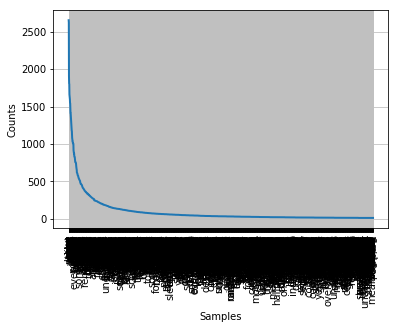

In [14]:
dist_freq.plot(2000, cumulative=False) 

As we can see, our dataset even after removal of the stop words follows the Zipf distribution, which is a good check before digging deeper

<center> As I said before, the lyrics in Metalcore and Hardcore are deeper than most of the commercial generic music on radios... We can have a look at the so called **Hapax richness**, measure of unique words used in the text to see how many non-repetitive words are used. We can therefore **approximate the richness of the vocabulary** of the lyric writers!

In [15]:
nlp = spacy.load('en_core_web_sm')
tokens_freq = Counter([word for word in corpus_for_FreqDist])
len(dict((k, v) for k, v in tokens_freq.items() if v <= 10))/len(tokens_freq) 

0.7273999766709437

<center> **72.7%** of the words (after removal of the stopwords) is **used less than 10 times in 80,000 lines** of lyrics! Well that sounds like we are on the right track to prove that lead singer, usually authors of the lyrics, have a pretty great range of vocabulary 

<center> Why don't we explore the metrics a little bit more... Let's see how many words fall within so called **lexical density** (measure that is showing what percentage of words is actually conveying content)

In [16]:
# goal is to build DataFrame from normalized_words FOR LEXICAL DENSITY (I am simply adding the words in each line into actual full line)
normalized_words
list_for_dF = []
for sentence in normalized_words:
    whole_sentence = str()
    for word in sentence:
        whole_sentence += " " + word
    list_for_dF.append(whole_sentence)
        

dF_for_TM = pd.DataFrame(list_for_dF, columns= ["text"])

In [ ]:
# calculated lexical density (nouns, adjectives, verbs, adverbs and pronouns taken as the word types conveying message according to literature)
counter = 0 
for sentence in list_for_dF:
    for token in nlp(sentence):
        if token.pos_ in ['NOUN','ADJ','VERB','ADV','PROPN']:
            counter += 1 

print(counter/sum([len(line) for line in normalized_words]))
# This one takes a while to process...

<center> Approximately **46%** of content words is not as much as I wished for (approximately the same as spoken language) BUT! still better than mumble rap such as all the Lil Peep's, Lil Yachties....

<center>The **lower amount of content words** could be caused by **lower average lenght** of the lines in lyrics. What could be more insightful is to have a look at what kind of adjectives are used in the connection with the terms I know are **important topics** in the culture of Metalcore

In [17]:
# Lets see how they are describing the words of interest
list(set([(word.text, word.head.text, word.dep_) for sentence in list_for_dF[:20000] for word in nlp(sentence) if (word.head.text == "world" and word.dep_ == "amod")]))

[('new', 'world', 'amod'),
 ('better', 'world', 'amod'),
 ('whole', 'world', 'amod'),
 ('weary', 'world', 'amod'),
 ('dying', 'world', 'amod'),
 ('real', 'world', 'amod'),
 ('wide', 'world', 'amod'),
 ('cold', 'world', 'amod'),
 ('full', 'world', 'amod'),
 ('digital', 'world', 'amod'),
 ('perfect', 'world', 'amod')]

<center> **"new", "perfect", "better"** well that sounds optimistic!  **"whole",  "full", "dying"** Well that supports the prelimitary topic division (it seems they are actually concerned about the state of our planet) 

# Word2Vec for further analysis and clustering

Now, when we had a little statistical look at the corpus, I will transform the data into the dense representation for  **clustering** and further analysis. Both points should help us to understand better what are the song lyricists writing about

In [18]:
w2v_model = Word2Vec(size=100, 
                     window=15, 
                     hs=0,
                     sample=0.000001,
                     negative=5, 
                     min_count=20,
                     workers=1, # with the size of the dataset, 1 worker had to be used to stabilize the replicability of the results
                     iter=1000
)

w2v_model.build_vocab(normalized_words)

w2v_model.train(normalized_words, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

(14285923, 528616000)

<center> After training the Word2Vec model, we are able to have a look if the mathematical vector representation shows what we would expect. (btw. the author of the model, Mikolov, is Czech... at least some pride for our little country)

In [19]:
print(w2v_model.wv.similarity("trust","love")) # looks just about right, the model understands terms that should be close!

0.86751556


In [20]:
print(w2v_model.wv.most_similar("love", topn=3)) # looks like the lyricists are very optimistic!

[('supposed', 0.880073606967926), ('happy', 0.8781769275665283), ('guess', 0.876181423664093)]


In [21]:
print(w2v_model.wv.most_similar("trust", topn=3)) # Well... not always

[('believed', 0.9406306147575378), ('supposed', 0.9362158179283142), ('choice', 0.9352870583534241)]


In [22]:
print(w2v_model.wv.similarity("hope","human")) # But this still shows they have some faith in humanity!

0.6215755


In [23]:
w2v_model.wv.doesnt_match(['love', 'trust', 'hate']) # thats what were talking about!

C:\Users\Michal\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'hate'

In [24]:
w2v_model.wv.doesnt_match(['singer', 'concert', 'hate']) # See? It doesn't matter people crush into each other in moshpits during concerts

C:\Users\Michal\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'hate'

In [25]:
w2v_model.wv.doesnt_match(['concert', 'understanding', 'hate']) # Just to make sure "hate" is not the odd one just because of the part of the speach 

C:\Users\Michal\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'hate'

<center> This was a little proof that **metalcore bands disapprove violance and hate speech** exactly as I said at the beginning!

<center> The next command is just to show the model works properly and puts the words into right places

In [26]:
def print_word_table(table, key):
    return pd.DataFrame(table, columns=[key, 'similarity'])
print_word_table(w2v_model.wv.most_similar(positive=['show', 'music'], negative=['hate']), 'Analogy')

,Analogy,similarity
0,guilt,0.779024
1,tears,0.749975
2,build,0.747816
3,staircase,0.746407
4,sweat,0.745274
5,beats,0.723432
6,sorrow,0.720989
7,feeds,0.695692
8,cancer,0.682465
9,fears,0.679057


<center> Up until now, we always had a look at a **very small** and specific part of the content, lets **visualize** the way Word2Vec placed the vectors. We will be able to see better what **words** are in the **corpus**

In [27]:
#To be able to visualize the vectors with the respective words, we need to add few lines of processing...
corpus2 = []
for line in corpus:
    for word in line:
        corpus2.append(word)


stop_words = set(stopwords.words('english'))

normalized_words2 = [word for word in corpus2 if not word in stop_words]

# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [w2v_model[word] for word in normalized_words2 if word in w2v_model.wv.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in normalized_words2 if word in w2v_model.wv.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

C:\Users\Michal\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
promise,0.119157,-0.059507,0.017388,-0.074408,0.081647,-0.002437,-0.089079,0.058105,0.091474,0.023611,...,-0.022043,-0.182532,0.107459,-0.158320,-0.051974,0.106707,0.147654,0.322796,-0.101487,-0.230479
times,0.112335,-0.321752,0.195062,-0.086482,0.012530,0.366911,0.099221,-0.015777,0.208433,-0.156541,...,-0.336866,-0.177983,0.521911,-0.367831,0.036715,0.227372,0.108975,0.360741,0.117041,0.005317
sad,0.055927,-0.255717,0.110186,0.059495,-0.058016,0.211492,-0.000354,0.116885,0.001268,-0.033058,...,-0.242972,-0.022828,0.316896,-0.219001,0.023589,0.186598,0.000751,0.375963,0.150239,-0.178453


In [28]:
# Initialize t-SNE to reduce the dimensions so we can visualize the result
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:400])

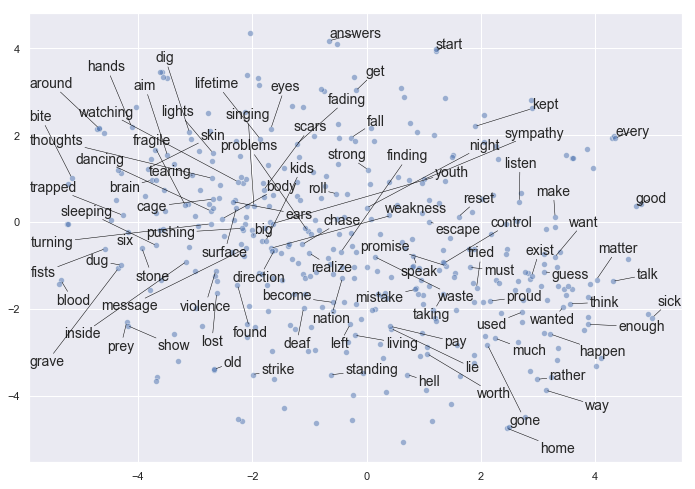

In [29]:
# Lets set up the plot and have a look at the words in the corpus!
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 4))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

<center> We can see **two things**. Firstly, in 2D the words are very **uniformly** spread around. Secondly, some **interesting words are starting to pop up when considered we are talking about lyrics!** Seems like our richness of text analysis done before was just about right!

<center> **Great idea** at this point is to **generate** some **new lyrics** to discover the vocabulary and sentiment we can expect in the songs.

In [30]:
# Here, I am setting up everything so I can generate some new awesome metalcore lines!
# (I had to use only bigram model as higher models has huge perplexity due to complex structuring of the lyrics and the size of the dataset)

smoothing = 0.001
counts = defaultdict(lambda: defaultdict(lambda: smoothing))

for sentence in normalized_words:
    tokens = ['*'] + sentence + ['STOP']
    for u, w in nltk.ngrams(tokens, 2):
        counts[(u)][w] += 1

def logP(u, w):
    return np.log(counts[(u)][w]) - np.log(sum(counts[(u)].values()))

def sentence_logP(S):
    tokens = ['*'] + S + ['STOP']
    return sum([logP(u, w) for u, w in nltk.ngrams(tokens, 2)])

<center> Here is a good time to do a little check of the probabilities

In [31]:
sentence_logP("i love you".split())

-12.75135416951473

<center> Is that a lot? Let's compare it with something else

In [32]:
sentence_logP("go kill yourself".split())

-33.67559533026909

<center> Well... Exactly as I said at the beginning. It all about love! ;) 

In [33]:
sentence_logP("hate racism".split())

-20.243184082542186

<center> I was expecting it to be a bit more likely but taken into account how difficult it is to rhyme racism with anything... Not bad at all

<center> But now, back to the **lyrics generator**

In [34]:
# Due to high perplexity, I was forced to reduce model to unigram...
def perplexity_measure(corpus):
    perplex = 0
    for sentence in corpus:
            perplex += sentence_logP(sentence) * np.exp(sentence_logP(sentence))
    return 2**(-perplex)

print(perplexity_measure(normalized_words))

12.646713385842476


In [36]:
# Here I am using the generation method used in class implemented for a unigram model
def sample_next_word(u):
    keys, values = zip(*counts[(u)].items())
    values = np.array(values)
    values /= values.sum() # create probability distro
    sample = np.random.multinomial(1, values) # pick one position
    return keys[np.argmax(sample)]

def generate():
    result = ['*']
    next_word = sample_next_word(result[-1])
    result.append(next_word)
    while next_word != 'STOP':
        next_word = sample_next_word(result[-1])
        result.append(next_word)

    return ' '.join(result[2:-1])

<center>  Even though it doesnt make meaningful sentences, it is interesting to get the feeling of the **vocalubary used**

In [41]:
print(generate())

am killing me into a world


<center> enough fun, lets **dig deeper** into the **topics** the lyrics are talking about

## TOPIC MODELS

With a bit deeper understanding what kind of lyrics we are looking at, let us discover the topics they are writing about

In [42]:
# I am making sure I am using the right data at some points in this section, those steps also help with the speed as some 
# of the steps take too long to be run again and again...

with open("normalized_words.txt", "wb") as fp:
    pickle.dump(normalized_words, fp)

In [ ]:
# For the topic models, I am introducing different preprocesing as now it is necessary to get rid of the excess of filler words
nlp = spacy.load('en_core_web_sm')
def clean(text):
    return ' '.join([token.lemma_ for token in nlp(text) if token.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV', 'X'}])

In [ ]:
# you can easily skip this step and just load the data from the next line
dF_for_TM = dF_for_TM["text"].apply(clean)

In [43]:
# I am using these line exactly because of the time it takes to preprocess the data
with open("TopicModels.txt", "rb") as fp:
    dF_for_TM = pickle.load(fp)   

In [44]:
# Here I am just restucturing the data to the proper input for LDA
dF_for_TM = [element for element in dF_for_TM if element]
dFF_for_TM = pd.DataFrame(dF_for_TM, columns= ["text"])
print(dFF_for_TM)

                                             text
0                             promise time so sad
1                          day good will even bad
2                            know married problem
3                                     always head
4                         destine greatness death
5                         destine greatness death
6                                think stand tall
7                                 repress resolve
8      happiness ignorance so different after all
9                                    think strong
10                                     time wrong
11                              live lie too long
12                              live lie too long
13                            now push come shove
14                                sign deed blood
15                                      need drug
16                                      need drug
17                            promise time so sad
18                         day good will even bad


In [45]:
# I am creating all the needed data formats for the model
instances = dFF_for_TM.text.apply(str.split)
print("creating dictionary", flush=True)
# read in instances and create Dictionary object w information about frequencies etc. 
dictionary = Dictionary(instances)
dictionary.filter_extremes(no_below=20, no_above=0.1)
# get rid of words that are too rare or too frequent
print(dictionary, flush=True)

creating dictionary
Dictionary(1218 unique tokens: ['promise', 'sad', 'so', 'time', 'bad']...)


In [46]:
print("translating corpus to IDs", flush=True)
ldacorpus = [dictionary.doc2bow(text) for text in instances]
len(ldacorpus) # I had issues with missing data/empty rows

translating corpus to IDs


70666

In [47]:
# Addressing some empty rows
ldacorpus = [element for element in ldacorpus if element] 
len(ldacorpus)

69054

In [48]:
# learn TFIDF values from corpus
print("tf-idf transformation", flush=True)
tfidfmodel = TfidfModel(ldacorpus)
# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]

tf-idf transformation


In [49]:
#Checking if there are still any empty rows
[i for i,x in enumerate(ldacorpus) if not x] 

[]

<center> After preparing all the needed data structures, I can finally asses what is the right number of topics

<center> The initial assumption was that I wanted to focus on **4 topics**
    a) **Metalcore** as genre has a few main streams, **one** focusing on **society**, another on **mental health**
    b) **Hardcore** is focusing on the **enviromental challenges and society** but with slightly different type of lyrics than Metalcore. In the end, as the genres apparently have some overlay, **3 Topics** ended up as better choice.

In [50]:
# Here we are trying out what is the ideal amount of topics
coherence_values = []
model_list = []

#LdaModel instead of LdaMulticore used because of problems with paralellization (cv_score was running into issues with division by zero)
for num_topics in range(2, 16):
    model = LdaModel(corpus=model_corpus[:math.floor(len(model_corpus)*2/3)], id2word=dictionary, num_topics=num_topics)
    model_list.append(model)
    coherencemodel_umass = CoherenceModel(model=model, 
                                          texts=instances[math.floor(len(model_corpus)*2/3):], 
                                          dictionary=dictionary, 
                                          coherence='u_mass')

    coherencemodel_cv = CoherenceModel(model=model, 
                                       texts=instances[math.floor(len(model_corpus)*2/3):], 
                                       dictionary=dictionary, 
                                       coherence='c_v')

    umass_score = coherencemodel_umass.get_coherence()
    cv_score = coherencemodel_cv.get_coherence()
    
    print(num_topics, umass_score, cv_score)
    coherence_values.append((num_topics, umass_score, cv_score))

2 -9.779028237119372 0.5125968659202668
3 -11.665251263622595 0.531722154501151
4 -12.420398230417153 0.542980187006383
5 -13.14860492709774 0.5448548493099789
6 -13.719696115263998 0.5652503654640587
7 -14.192533295785564 0.5817659449604563
8 -13.806828498973701 0.561953119585959
9 -13.96610007618171 0.5654200907073278
10 -14.97670732168643 0.5893873487176914
11 -14.83641515969684 0.585405562332081
12 -15.584361219881814 0.6034520829684297
13 -15.823206767675089 0.6111442778141307
14 -16.08081001629439 0.622679549735082
15 -16.24850981979633 0.6175001842271265


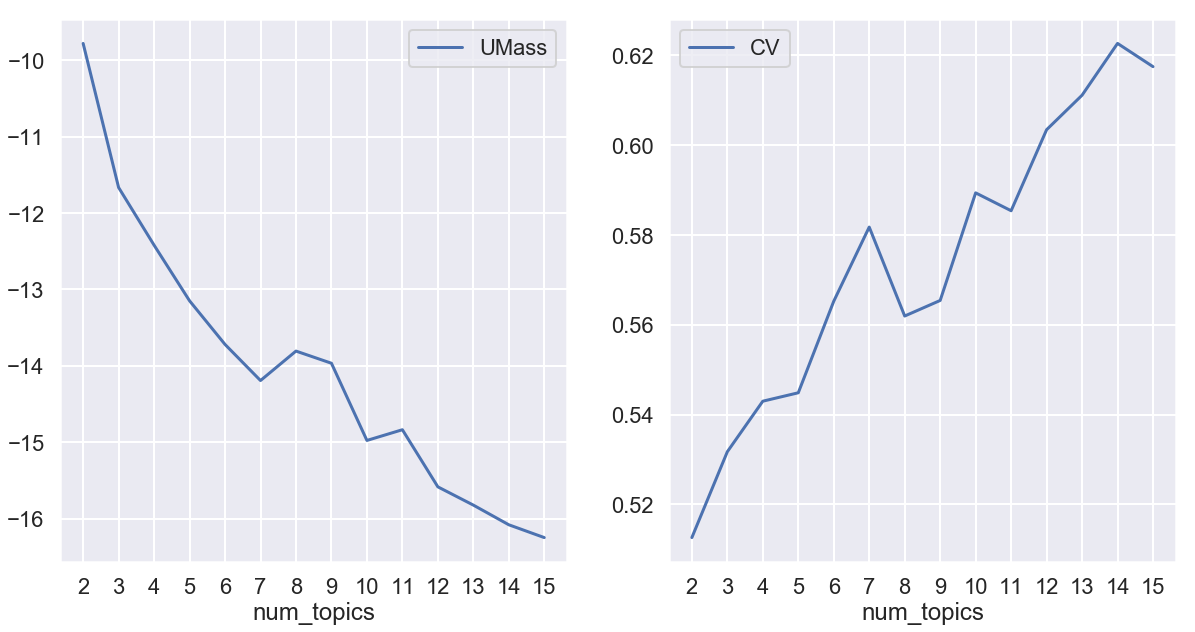

In [51]:
%matplotlib inline

sns.set_context('poster') # use large font


scores = pd.DataFrame(coherence_values, columns=['num_topics', 'UMass', 'CV'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
scores.plot.line(x='num_topics', y='UMass', ax=ax[0], xticks=range(2,16));
scores.plot.line(x='num_topics', y='CV', ax=ax[1], xticks=range(2,16));


<center> As the results are rather ambiguous I will stick to the 3 topics (with the overlay in the genres)

<center> Now it is time to finally fit the model

In [74]:
num_topics = 3

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaModel(num_topics=num_topics, # number of topics
                     corpus=model_corpus, # what to train on 
                     id2word=dictionary, # mapping from IDs to words
                     passes=num_passes, # make this many passes over data
                     chunksize=chunk_size, # update after this many instances
                     alpha=0.5
                    )
    
print("done in {}".format(time.time()-start), flush=True)


3452.7
fitting model
done in 136.18204998970032


In [75]:
# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=10)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:10]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))

1 "live", "just", "save", "look", "piece", "life", "do", "go", "gate", "when"
2 "destruction", "end", "lie", "road", "world", "bring", "feed", "get", "here", "lose"
3 "never", "time", "now", "turn", "can", "hear", "know", "one", "fear", "come"


<center> As we can see, one of the topics is **very actionable** (short verbs), giving drive to the lyrics. Another one, is a bit **melancholic** with words such as "destruction". The last topic is more **introspective**.

<center> Even though the topics guesses at the beginning turned out to be off by one, the result still shows the overall sentiment of the whole genre

## NMF

<center> I will now compare the results of the first topic modelling with matrix factorization

In [76]:
# I am using the data in the form of TF-IDF
tfidf_vectorizer = TfidfVectorizer(analyzer='word', 
                                   sublinear_tf=True, 
                                   use_idf=True)

X = tfidf_vectorizer.fit_transform(dFF_for_TM.text)

print(X.shape)

(70666, 5886)


In [77]:
# Seeding the model with 3 topics as before
nmf = NMF(n_components=3, init='nndsvd', random_state=0)

%time W = nmf.fit_transform(X)
H = nmf.components_

Wall time: 1.47 s


In [78]:
def show_topics(A, vocabulary, topn=8):
    topic_words = ([[vocabulary[i] for i in np.argsort(t)[:-topn-1:-1]]
                    for t in A])
    return [', '.join(t) for t in topic_words]

In [79]:
terms = tfidf_vectorizer.get_feature_names()

sorted(show_topics(H, terms))

['can, go, let, take, so, now, just, feel',
 'know, now, never, just, need, would, want, get',
 'will, never, see, give, make, end, find, say']

<center> For the comparison with the LDA topic model, our three topics found by NMF are, at least from the first words, more actionable and less centered around deep dark emotions

## Clustering - K-means w/ W2C as input

As a last part, I will try to **cluster** the words into the four clusters I originally proposed (without overlay in genres) and I will use the **dense Word2Vec representation** to do so

<center> I start with approximation of the cluster centers

In [58]:
# Initiallizing of the agglomerative clustering
k = 4

agg = AgglomerativeClustering(n_clusters=k)

In [59]:
word_vectors = w2v_model.wv.vectors

In [60]:
%time agg_sample_ids = agg.fit_predict(word_vectors)

Wall time: 499 ms


In [61]:
# Calculating of the centroids of the clusters
centroids = np.array([word_vectors[agg_sample_ids == c].mean(axis=0) for c in range(k)])
print(centroids.shape)

(4, 100)


In [62]:
# Using those centroids as the starting point for the KMeans clustering
km = KMeans(n_clusters=k, 
            n_jobs=-1, 
            init=centroids)

%time km.fit(word_vectors)

C:\Users\Michal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """Entry point for launching an IPython kernel.


Wall time: 1.62 s


KMeans(algorithm='auto', copy_x=True,
       init=array([[ 0.10279104, -0.07578515, -0.00696665,  0.3914604 , -0.01348667,
         0.18323275, -0.06005833,  0.08402347, -0.01845873,  0.0613279 ,
        -0.03071271, -0.23325315,  0.3872513 ,  0.18479738,  0.1141089 ,
        -0.12704125,  0.19320402,  0.23430759,  0.29637116, -0.11374712,
        -0.12323336, -0.13325062,  0.20420925, -0.08533878, -0.08454774,
        -0.19530687, -0.12...
        -0.00784554,  0.07684189,  0.14872761,  0.04969533, -0.05880478,
         0.01836088, -0.2874131 ,  0.03202353, -0.03865241, -0.09486678,
        -0.04650324, -0.24681698,  0.10211319, -0.27042302, -0.01874479,
         0.18718249,  0.16604327,  0.23331934, -0.07832349, -0.2387312 ]],
      dtype=float32),
       max_iter=300, n_clusters=4, n_init=10, n_jobs=-1,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [63]:
# I further use the words and respective clusters for analysis
words = list(w2v_model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(km.labels_[i]))

i:3
promise:2
you:3
there:3
is:1
times:3
am:1
not:3
so:3
sad:3
some:3
days:1
the:2
good:2
will:3
even:1
out:2
bad:3
know:1
to:3
my:1
problems:3
it:3
always:1
in:3
head:3
and:3
for:2
or:2
death:3
thought:3
was:3
standing:3
tall:3
with:1
no:2
happiness:3
ignorance:1
are:3
different:2
after:1
all:2
being:1
strong:3
this:3
time:3
wrong:1
have:2
lived:3
a:1
lie:1
too:3
long:3
now:3
push:3
has:1
come:3
blood:3
need:3
another:1
could:3
make:3
can:1
barely:3
stand:3
comfort:2
quickly:3
fading:1
sickness:1
setting:1
beginning:3
think:3
these:1
demons:3
but:2
what:3
they:1
say:3
season:3
if:3
fall:1
again:1
be:3
end:2
just:1
pretend:1
over:3
bury:1
me:1
become:2
cure:3
disease:3
oh-oh-oh-oh:2
stuck:3
at:3
surface:1
progress:3
apart:2
well:3
answers:2
rope:3
noose:3
gettin:3
control:1
whole:1
like:3
on:3
when:3
grip:1
lost:1
still:3
feed:3
cost:3
taking:3
as:1
ever:3
smile:1
while:2
pressure:3
why:1
does:3
happen:3
should:3
fine:1
shake:3
save:3
your:1
breath:1
turning:2
into:2
static:2
chance:3


expect:1
themselves:1
crushed:1
men:1
humanity:2
other:1
fail:3
embrace:1
loss:2
train:2
dog:2
sisters:1
longing:1
leader:1
master:0
becoming:0
reflection:1
looked:1
owe:1
stare:1
tells:3
darling:1
fault:2
drive:2
united:2
box:2
fed:1
repentance:1
bringing:1
crossed:1
crooked:3
luck:3
talking:2
sinking:1
scent:3
saved:1
salt:0
loose:2
fought:2
miles:0
guts:2
chains:1
cycle:1
plagues:2
poor:1
moon:2
safety:1
agree:2
blessings:1
guilt:1
digital:2
closing:1
desire:2
ties:1
weary:2
secrets:1
driven:1
guide:2
panic:0
breeze:2
morning:1
soil:1
oil:2
gaze:1
horizon:2
sever:1
greater:2
melt:1
oxygen:1
tongues:1
crying:3
attention:1
happening:2
ours:0
spell:1
act:1
exactly:1
mask:2
carve:1
weeks:1
test:1
dragging:3
chained:1
convictions:2
loves:1
sorrow:2
asking:3
stones:0
lake:1
ooh:3
aware:1
messed:3
bells:2
mark:2
ship:1
shining:2
heartbreak:2
sounds:0
shaking:3
hurts:1
legs:1
horse:2
crushing:1
exit:3
wishing:2
wipe:3
hello:2
quiet:1
glad:3
note:2
hoping:1
spoken:1
footsteps:2
cherish:2
lau

In [64]:
centers = km.cluster_centers_
Z = w2v_model.wv.vectors

<center> After finalizing the clustering, we can have a look at what are the most "typical" words for the cluster, meaning, the ones closest to the center of the cluster

In [65]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs)
    
#Closest points for each Cluster center is used to query the closest 10 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers]
    closest_words_idxs = [x[1] for x in closest_points]

#Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {}
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
        
#A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df


top_words = get_top_words(w2v_model.wv.index2word, 10, centers, Z)
print(top_words)

     Cluster #0   Cluster #1 Cluster #2 Cluster #3
1      precious  meaningless       snow   expected
2      whispers      missing     golden       went
3        breeze       divine      paper      crazy
4       balance         near       form       dare
5       consume     disguise      holds    pretend
6      returned     complete     laying    exactly
7   oh-oh-oh-oh         case    dancing       seem
8       fragile        judge      cover       heal
9         train    suffocate      steel   believed
10      martyrs        needs   climbing     spoken


<center> From the results, we can see 4 very different clusters of words. **ONE** (snow, golden) very descriptive, **Second**
   (divine, judge, disguise) very deep, **third** similar to the previous one, **fourth** one rather actionable. The order of the cluster changes with every clustering...

<center> I will further visualize the clusters in 2 dimensions in order to get a better grasp of the situation

In [66]:
sns.set_context('notebook')

def plot_vectors(words, vectors, title='VIZ', labels=None, dimensions=3):

    # set up graph
    fig = plt.figure(figsize=(10,10))

    # create data frame
    df = pd.DataFrame(data={'word': words ,'x':vectors[:,0], 'y': vectors[:,1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
    else:
        df['label'] = [''] * len(df)
      
    color_list = []
    for n_of_color in labels:
        if n_of_color == 1:
            color_list += "g"
        if n_of_color == 0:
            color_list += "b"
        if n_of_color == 2:
            color_list += "y"
        if n_of_color == 3:
            color_list += "r"       
    
    # plot in 2 dimensions
    if dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca() 
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        
        df2 = list(zip(words, vectors[:,0], vectors[:,1], color_list))

        for d in df2:
            path = TextPath((0,0), d[0])    
            plt.plot(d[1],d[2],'.',color='k')
            plt.plot(d[1],d[2],marker=path, color = d[3], markersize = 70)
            
        plt.xlim([df["x"].min()/2,df["x"].max()/2])
        plt.ylim([df["y"].min()/2,df["y"].max()/2])

    else:
        raise NotImplementedError()

    plt.title(title)
#     plt.legend()
    plt.show()

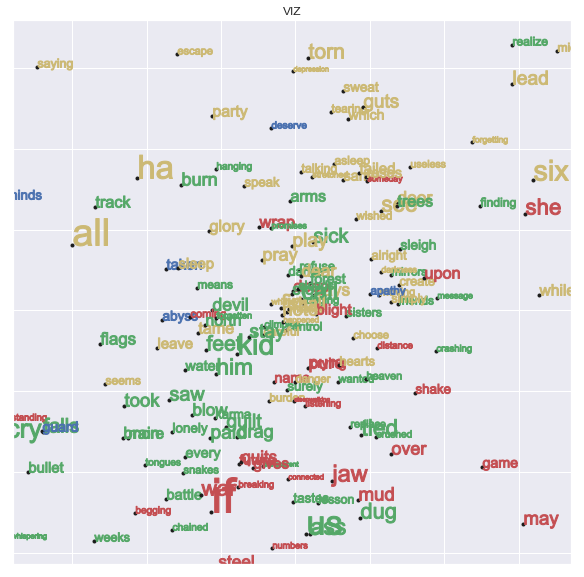

In [67]:
plot_sample = np.random.choice(len(word_vectors), replace=False, size=200)
plot_vectors(np.array(list(w2v_model.wv.vocab))[plot_sample], word_vectors[plot_sample], labels=km.labels_[plot_sample], dimensions = 2)

<center> We can see that the clusters are difficult to separate in the lower dimensionality and also that one of them is very stretched out. I will further investigate on that after evaluating the right amount of clusters

In [68]:
named_vectors_iterator = zip(w2v_model.wv.vocab,word_vectors)
named_vectors = list(named_vectors_iterator)

<center> Here I am evaluating the cluster count using Silhouette scoring

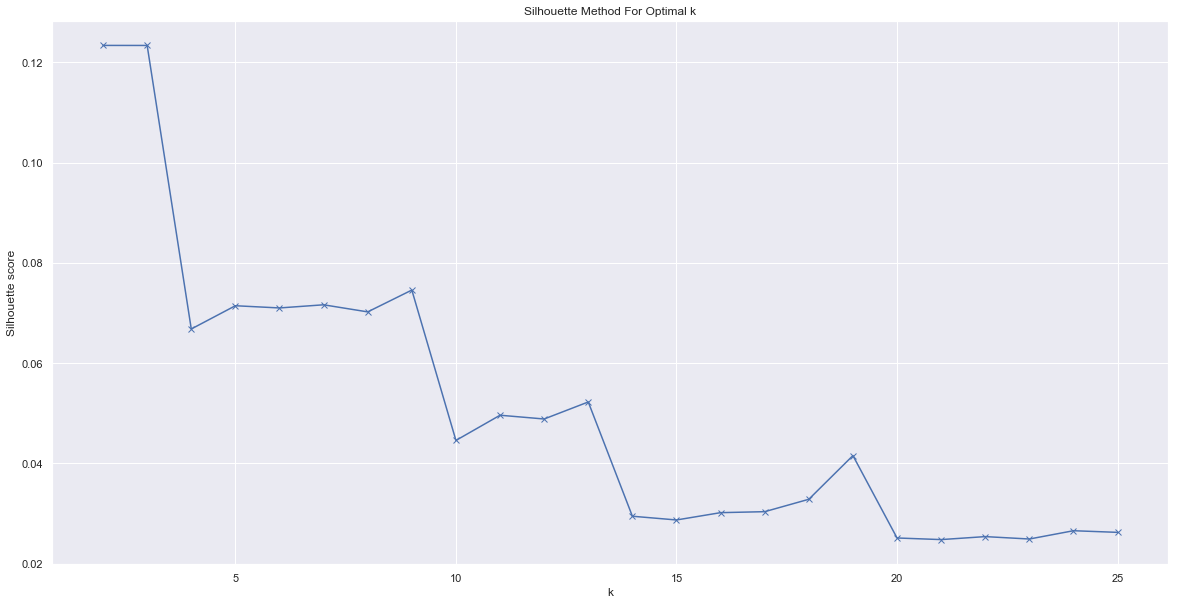

In [69]:
silhouettes = []

K = range(2, 26)

# used because the cycle throws a warning message on every iteration
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

for c in K:
    agg_clustering = AgglomerativeClustering(n_clusters=c)

    agg_cluster_ids = agg_clustering.fit_predict(word_vectors)
    agg_centroids = np.array([word_vectors[[i for i, v in enumerate(agg_cluster_ids) if v == k]].mean(axis=0) for k in range(c)])

    kmeans_clustering = KMeans(n_clusters=c, n_jobs=-1, init=agg_centroids)
    kmeans_ids = kmeans_clustering.fit_predict(word_vectors)
    score = silhouette_score(word_vectors, kmeans_ids)
    silhouettes.append(score)
    
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method For Optimal k')
plt.show()

<center> From the Sillhouette score, it seems 3 clusters would be a wiser choice, lets investigate a little bit more

I would like to see, if the clusters are clustered similarily or if there is one cluster that is "catch-all" for things that don't fit

In [70]:
def get_distances_of_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs)
    
#Closest points for each Cluster center is used to query the closest 10 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers]
    closest_words_idxs = [x[1] for x in closest_points]
    closest_words_distances = [x[0] for x in closest_points]
    closest_words_avg = [np.mean(x) for x in closest_words_distances]

#Word Index is queried for each position in the above array, and added to a Dictionary.
    words_and_distances = []
    for i in range(4):
        for j in range(50):
            tupple = (index2word[closest_words_idxs[i][0][j]],closest_words_distances[i][0][j],i)
            words_and_distances.append(tupple)
    return words_and_distances

top_words2 = get_distances_of_words(w2v_model.wv.index2word, 50 ,centers, Z)
data_count = pd.DataFrame(top_words2, columns= ["words","distances","cluster"])

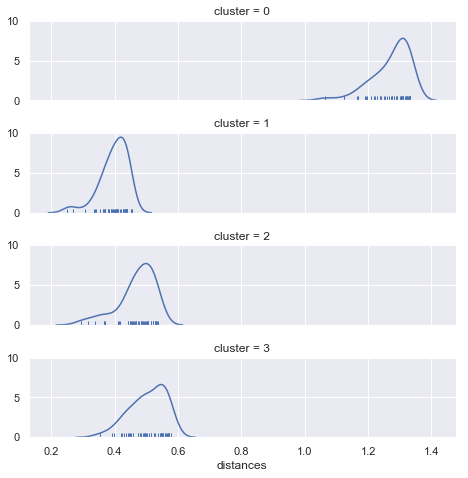

In [71]:
# Lets have a look at the compactness of the clusters through the distances of the words from the center of the cluster
g = sns.FacetGrid(data_count, row="cluster",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "distances", hist=False, rug=True);

<center> My hypothesis proved to be right and one cluster is a compilation of things that dont fit, I will rerun the clustering with 3 clusters

In [72]:
# Exactly the same steps as before taken with 3 clusters
k = 3

agg = AgglomerativeClustering(n_clusters=k)

word_vectors = w2v_model.wv.vectors

%time agg_sample_ids = agg.fit_predict(word_vectors)

centroids = np.array([word_vectors[agg_sample_ids == c].mean(axis=0) for c in range(k)])

print(centroids.shape)

km = KMeans(n_clusters=k, 
            n_jobs=-1, 
            init=centroids)
%time km.fit(word_vectors)

centers = km.cluster_centers_
Z = w2v_model.wv.vectors



Wall time: 235 ms
(3, 100)
Wall time: 22 ms


In [73]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs)
    
#Closest points for each Cluster center is used to query the closest 10 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers]
    closest_words_idxs = [x[1] for x in closest_points]

#Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {}
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
        
#A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df


top_words = get_top_words(w2v_model.wv.index2word, 10, centers, Z)
print(top_words)

   Cluster #0 Cluster #1 Cluster #2
1        dare   precious     golden
2       tells   whispers          2
3    whatever    balance      holds
4     talking    consume      cover
5     content   returned      grace
6    believed    martyrs       snow
7        went     breeze       worn
8        heal    fragile   sunlight
9      choice      train     burden
10    pretend  blessings  attention


<center> Now we ended up with just three clusters. **One** very focused on decisions, **Another** descriptive and **Last** very actionable

## Conclusions

The initial hypothesis of the metalcore and hardcore lyrics being about more than just drinking and enjoying life (as most of mainstream pop music...) was very well supported by the initial linguistic analysis of the text at the beginning of the script.

Afterwards, we saw a overview of the words in lyrics done by Word2Vec transformation and the following lyrics generation. 

Furthermore, with Topic Modeling we saw LDA and Matrix factorization approaches that were a bit unstable, due to the nature of the method but also the size of the dataset. 

In the end, the clustering ended up being more descriptive and accurate overview...

I believe I convinced the readers and maybe pushed at least someone to google one of my favorite bands!

P.S. here is a link ;) : (https://www.youtube.com/watch?v=RvWbcK3YQ_o)